<a href="https://colab.research.google.com/github/cesarofuchi/pyuvp/blob/master/test_pyuvp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyuvp

In [ ]:
!pip3 install pickle5
import pickle5 as pickle

     |████████████████████████████████| 133kB 4.9MB/s 
  Created wheel for pickle5: filename=pickle5-0.0.11-cp37-cp37m-linux_x86_64.whl size=219271 sha256=4622792c81aadfc35a6bcba9dbba316cc390eef069277ad8984b99e199cceb86
  Stored in directory: /root/.cache/pip/wheels/a6/90/95/f889ca4aa8b0e0c7f21c8470b6f5d6032f0390a3a141a9a3bd
Successfully built pickle5


In [ ]:
import pyuvp.ultrasound as us
import pyuvp.ultrasound_doppler as usd

import matplotlib.pyplot as plt
from scipy.signal import medfilt2d,lfilter,hilbert
import math
import numpy as np

In [ ]:
with open('/content/liquid_velocity_05_fprf1000.pickle', 'rb') as f:
    velocity_data = pickle.load(f)

## Creating ultrasonic object

In [ ]:
fs=50e6
fc=4e6
fprf=1000
samples=5000
nwaves, samples= velocity_data.shape
usObj=us.Ultrasound(fs,fc,fprf,samples,nwaves,velocity_data)

## Evaluate Ultrasonic Raw Data
Let's see the ultrasonic raw data with A-scan and B-scan plots

Text(0.5, 1.0, 'A scan')

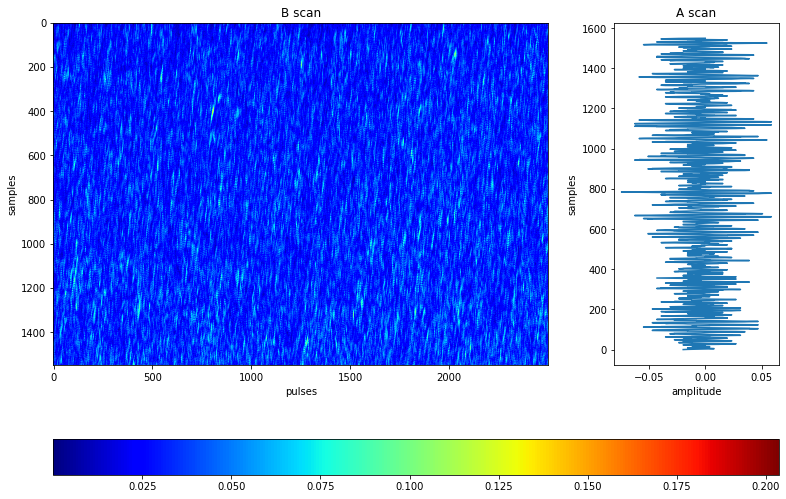

In [ ]:
# A Scan
fig, ax=plt.subplots(1,2,figsize=(13, 9),gridspec_kw={'width_ratios': [3, 1]})
cm = plt.cm.get_cmap("jet")
sc=ax[0].imshow(abs(hilbert(velocity_data)),cmap=cm,aspect='auto')
ax[0].set_title('B scan')
ax[0].set_ylabel('samples')
ax[0].set_xlabel('pulses')
fig.colorbar(sc, ax=ax, orientation="horizontal")
x=np.arange(0,velocity_data.shape[0],1)
ax[1].plot(velocity_data[:,1],x)
ax[1].set_xlabel('amplitude')
ax[1].set_ylabel('samples')
ax[1].set_title('A scan')

## Evaluate Velocity Profile

In [ ]:
c=1490
vmax=c*usObj.fprf/(4*usObj.fc)
ns=50;nc=50;ovs=1;ovt=1;
usdObj=usd.UltrasoundDoppler(usObj,ns,nc,ovs,ovt)
angle=10
print('c=',c,'m/s fprf=',usObj.fprf)
print('max measurable velocity=',vmax/math.sin(math.radians(angle)),'m/s')

c= 1490 m/s fprf= 1000
max measurable velocity= 0.5362855012427509 m/s


### Classic Autocorrelation

In [ ]:
flow,t=usdObj.auto_correlation(c)
flow_corrected=flow/math.sin(math.radians(angle)) 
#med filter for smoothing
flowfilt=medfilt2d(flow_corrected, [3, 3])
vmean=flowfilt.mean(axis=1)
print('mean flow:',np.mean(abs(vmean)),' total time:',t)

mean flow: 0.29045961852521324  total time: 0.18725037574768066


### Plot velocity map

Text(0.5, 1.0, 'A scan')

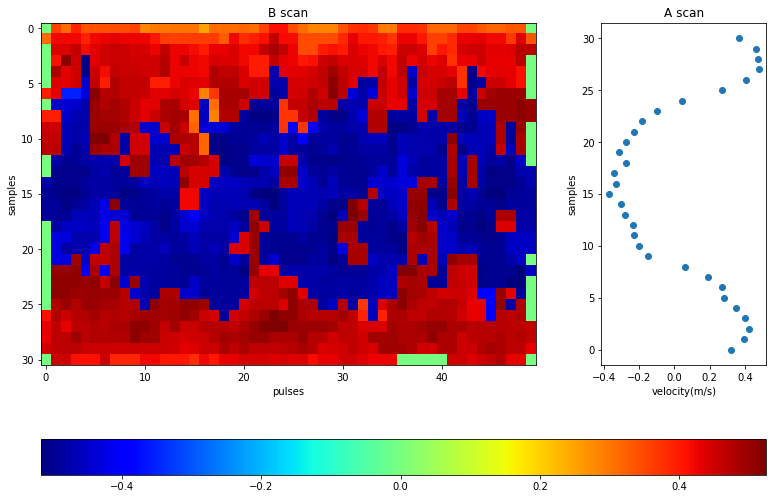

In [ ]:
fig, ax=plt.subplots(1,2,figsize=(13, 9),gridspec_kw={'width_ratios': [3, 1]})
cm = plt.cm.get_cmap("jet")
sc=ax[0].imshow(-flowfilt,cmap=cm,aspect='auto')
ax[0].set_title('B scan')
ax[0].set_ylabel('samples')
ax[0].set_xlabel('pulses')
fig.colorbar(sc, ax=ax, orientation="horizontal")
x=np.arange(0,flowfilt.shape[0],1)
ax[1].scatter(-np.mean(flowfilt,axis=1),x)
ax[1].set_xlabel('velocity(m/s)')
ax[1].set_ylabel('samples')
ax[1].set_title('A scan')

## Extended Autocorrelation

In [ ]:
# extended autocorrelation
flow,t=usdObj.auto_correlation(c,method='extended')
flow_corrected=flow/math.sin(math.radians(angle)) 
#med filter for smoothing
flowfilt_ex=medfilt2d(flow_corrected, [3, 3])
vmean=flowfilt_ex.mean(axis=1)
print('mean flow:',np.mean(abs(vmean)),' total time:',t)

mean flow: 0.5124544037333362  total time: 2.444777727127075


Text(0.5, 1.0, 'A scan')

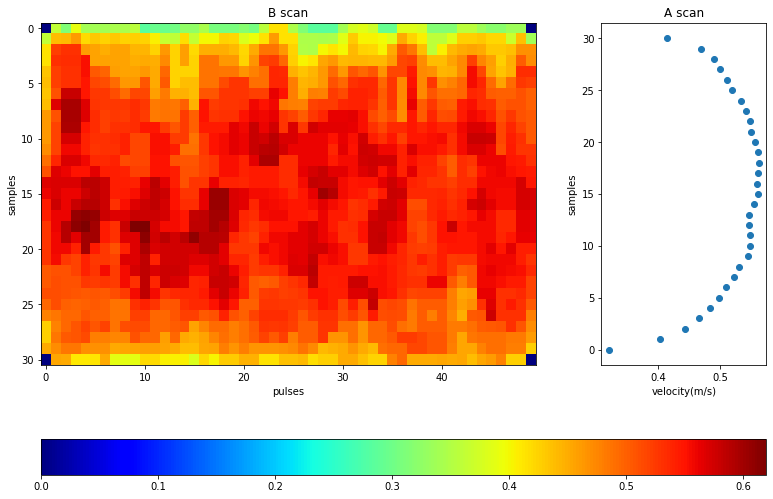

In [ ]:

fig, ax=plt.subplots(1,2,figsize=(13, 9),gridspec_kw={'width_ratios': [3, 1]})
cm = plt.cm.get_cmap("jet")
sc=ax[0].imshow(-flowfilt_ex,cmap=cm,aspect='auto')
ax[0].set_title('B scan')
ax[0].set_ylabel('samples')
ax[0].set_xlabel('pulses')
fig.colorbar(sc, ax=ax, orientation="horizontal")
x=np.arange(0,flowfilt_ex.shape[0],1)
ax[1].scatter(-np.mean(flowfilt_ex,axis=1),x)
ax[1].set_xlabel('velocity(m/s)')
ax[1].set_ylabel('samples')
ax[1].set_title('A scan')